## Мегалайн

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. 

Цель проекта:

    Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
    Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

Тариф «Смарт»

	1. Ежемесячная плата: 550 рублей
	2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
	3. Стоимость услуг сверх тарифного пакета:
		○ минута разговора: 3 рубля
		○ сообщение: 3 рубля
		○ 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

	1. Ежемесячная плата: 1950 рублей
	2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
	3. Стоимость услуг сверх тарифного пакета:
		○ минута разговора: 1 рубль
		○ сообщение: 1 рубль
		○ 1 Гб интернет-трафика: 150 рублей

Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Шаг 1. Файл с данными и общая информация

In [ ]:
# Импортируем библиотеку pandas
import datetime as dt
import math as mt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# И все используемое далее
from scipy import stats as st


In [ ]:
# И данные
try:
    calls = pd.read_csv('/datasets/calls.csv')
except Exception:
    ! gdown --id "Вырезано цензурой"
    calls = pd.read_csv('/content/calls.csv')

In [ ]:
try:
    internet = pd.read_csv('/datasets/internet.csv')
except Exception:
    ! gdown --id "Вырезано цензурой"
    internet = pd.read_csv('/content/internet.csv', index_col=0)

In [ ]:
try:
    messages = pd.read_csv('/datasets/messages.csv')
except Exception:
    ! gdown --id "Вырезано цензурой"
    messages = pd.read_csv('/content/messages.csv')

In [ ]:
try:
    tariffs = pd.read_csv('/datasets/tariffs.csv')
except Exception:
    ! gdown --id "Вырезано цензурой"
    tariffs = pd.read_csv('/content/tariffs.csv')

In [ ]:
try:
    users = pd.read_csv('/datasets/users.csv')
except Exception:
    ! gdown --id "Вырезано цензурой"
    users = pd.read_csv('/content/users.csv')

### calls

In [ ]:
# смотрим таблички
display('calls:', calls)

'calls:'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


### internet

In [ ]:
# столбец `unnamed_0` убираем в pd.read_csv(..., index_col=0)
display('internet:', internet)

'internet:'

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


### messages

In [ ]:
display('messages:', messages)

'messages:'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


### tariffs

In [ ]:
# Кто-то велосипед изобретал? Чего столбец-то по разному называется?
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
display('tariffs:', tariffs)

'tariffs:'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### users

In [ ]:
display('users:', users)

'users:'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [ ]:
# что там с названиями колонок:
display('calls:', calls.columns)
internet = internet.rename(columns={'Unnamed: 0': 'unnamed_0'})
print()
display('internet:', internet.columns)
print()
display('messages:', messages.columns)
print()
display('tariffs:', tariffs.columns)
print()
display('users:', users.columns)

'calls:'

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

'internet:'

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

'messages:'

Index(['id', 'message_date', 'user_id'], dtype='object')

'tariffs:'

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff'],
      dtype='object')

'users:'

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

### Объединенная таблица 

In [ ]:
df = calls
df = df.merge(internet, on='id', how='outer')
df = df.merge(messages, on='id', how='outer')
# до этого не хотел объединять по user_id. Писал: "Ядро умерло"
df = df.merge(users, on='user_id', how='outer')
df = df.merge(tariffs, on='tariff', how='outer')

# названия чуть поинформативнее:
df = df.rename(columns={'user_id_y': 'user_id_internet',
                        'user_id_x': 'user_id_call',
                        'user_id': 'user_id_message'})

display(df)

,id,call_date,duration,user_id_call,mb_used,session_date,user_id_internet,message_date,user_id_message,age,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000_0,2018-07-25,0.00,1000.0,112.95,2018-11-25,1000.0,2018-06-27,1000.0,52.0,...,Верещагин,2018-05-25,ultra,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
1,1000_1,2018-08-17,0.00,1000.0,1052.81,2018-09-07,1000.0,2018-10-08,1000.0,52.0,...,Верещагин,2018-05-25,ultra,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
2,1000_2,2018-06-11,2.85,1000.0,1197.26,2018-06-25,1000.0,2018-08-04,1000.0,52.0,...,Верещагин,2018-05-25,ultra,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
3,1000_3,2018-09-21,13.80,1000.0,550.27,2018-08-22,1000.0,2018-06-16,1000.0,52.0,...,Верещагин,2018-05-25,ultra,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
4,1000_4,2018-12-15,5.18,1000.0,302.56,2018-09-24,1000.0,2018-12-05,1000.0,52.0,...,Верещагин,2018-05-25,ultra,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1435.0,32.0,...,Азимова,2018-02-17,smart,50.0,15360.0,500.0,550.0,200.0,3.0,3.0
237349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1456.0,40.0,...,Андропова,2018-08-25,smart,50.0,15360.0,500.0,550.0,200.0,3.0,3.0
237350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1462.0,72.0,...,Абрамычева,2018-10-29,smart,50.0,15360.0,500.0,550.0,200.0,3.0,3.0
237351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1479.0,40.0,...,Богданов,2018-07-03,smart,50.0,15360.0,500.0,550.0,200.0,3.0,3.0


### Описание данных

Таблица calls (информация о звонках):

	• id — уникальный номер звонка
	• call_date — дата звонка
	• duration — длительность звонка в минутах
	• user_id — идентификатор пользователя, сделавшего звонок
    
Таблица messages (информация о сообщениях):

	• id — уникальный номер сообщения
	• message_date — дата сообщения
	• user_id — идентификатор пользователя, отправившего сообщение
    
Таблица internet (информация об интернет-сессиях):

	• id — уникальный номер сессии
	• mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
	• session_date — дата интернет-сессии
	• user_id — идентификатор пользователя
    
Таблица users (информация о пользователях):

	• user_id — уникальный идентификатор пользователя
	• first_name — имя пользователя
	• last_name — фамилия пользователя
	• age — возраст пользователя (годы)
	• reg_date — дата подключения тарифа (день, месяц, год)
	• churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
	• city — город проживания пользователя
	• tariff — название тарифного плана
    
Таблица tariffs (информация о тарифах):

	• tariff_name — название тарифа
	• rub_monthly_fee — ежемесячная абонентская плата в рублях
	• minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
	• messages_included — количество сообщений в месяц, включённых в абонентскую плату
	• mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
	• rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
	• rub_per_message — стоимость отправки сообщения сверх тарифного пакета
	• rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
    
Примечание. 

Если объединение таблиц командой merge приводит к ошибке dead kernell, примените join.

## Шаг 2. Подготовка данных

	• Приведите данные к нужным типам;
	• Найдите и исправьте ошибки в данных, если они есть.
    
Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

### Пропуски, формат  данных

In [ ]:
# Даты не в том формате
df['call_date'] = pd.to_datetime( df['call_date'], format='%Y-%m-%dT%H:%M:%S' )
df['session_date'] = pd.to_datetime( df['session_date'], format='%Y-%m-%dT%H:%M:%S' )
df['message_date'] = pd.to_datetime( df['message_date'], format='%Y-%m-%dT%H:%M:%S' )
df['reg_date'] = pd.to_datetime( df['reg_date'], format='%Y-%m-%dT%H:%M:%S' )
df['churn_date'] = pd.to_datetime( df['churn_date'], format='%Y-%m-%dT%H:%M:%S' )

# Чтобы думалось быстрее.
df_rus = df.rename(columns={'id': 'id',
                        'call_date': 'дат_зв',
                        'duration': 'длит_зв',
                        'user_id_call': 'id_польз_зв',
                        'mb_used': 'мегабайт',
                        'session_date': 'дат_инт',
                        'user_id_internet': 'id_польз_инт',
                        'message_date': 'дат_смс',
                        'user_id_message': 'id_польз_смс',
                        'age': 'возраст',
                        'city': 'город',
                        'first_name': 'имя',
                        'last_name': 'фамилия',
                        'reg_date': 'дат_тариф_вкл',
                        'churn_date': 'дат_тариф_выкл',
                        'tariff': 'тариф',
                        'messages_included': 'смс_мес',
                        'mb_per_month_included': 'мб_мес',
                        'minutes_included': 'минут_мес',
                        'rub_monthly_fee': 'аб_плат',
                        'rub_per_gb': 'цена_гб',
                        'rub_per_message': 'цена_смс',
                        'rub_per_minute': 'цена_мин',})

In [ ]:
display(df_rus.info()) # сколько значений и в каком формате

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237353 entries, 0 to 237352
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              237279 non-null  object        
 1   дат_зв          202607 non-null  datetime64[ns]
 2   длит_зв         202607 non-null  float64       
 3   id_польз_зв     202607 non-null  float64       
 4   мегабайт        149396 non-null  float64       
 5   дат_инт         149396 non-null  datetime64[ns]
 6   id_польз_инт    149396 non-null  float64       
 7   дат_смс         123036 non-null  datetime64[ns]
 8   id_польз_смс    123110 non-null  float64       
 9   возраст         123110 non-null  float64       
 10  дат_тариф_выкл  5348 non-null    datetime64[ns]
 11  город           123110 non-null  object        
 12  имя             123110 non-null  object        
 13  фамилия         123110 non-null  object        
 14  дат_тариф_вкл   123110 non-null  dat

None

In [ ]:
display(df_rus.isna().mean()) # подсчёт пропусков в долях (перевод в % - лишний код)

id                0.000312
дат_зв            0.146390
длит_зв           0.146390
id_польз_зв       0.146390
мегабайт          0.370575
дат_инт           0.370575
id_польз_инт      0.370575
дат_смс           0.481633
id_польз_смс      0.481321
возраст           0.481321
дат_тариф_выкл    0.977468
город             0.481321
имя               0.481321
фамилия           0.481321
дат_тариф_вкл     0.481321
тариф             0.481321
смс_мес           0.481321
мб_мес            0.481321
минут_мес         0.481321
аб_плат           0.481321
цена_гб           0.481321
цена_смс          0.481321
цена_мин          0.481321
dtype: float64

In [ ]:
display(df_rus.describe()) # вдруг чего "на глазок" проявится 

,длит_зв,id_польз_зв,мегабайт,id_польз_инт,id_польз_смс,возраст,смс_мес,мб_мес,минут_мес,аб_плат,цена_гб,цена_смс,цена_мин
count,202607.000000,202607.000000,149396.000000,149396.000000,123110.000000,123110.000000,123110.000000,123110.000000,123110.000000,123110.000000,123110.000000,123110.000000,123110.000000
mean,6.755887,1253.940619,370.192426,1252.099842,1256.974884,46.514052,425.400861,21429.639184,1487.897003,1103.222322,180.242060,2.209682,2.209682
std,5.843365,144.722751,278.300951,144.050823,143.520154,16.890881,464.442422,7509.300639,1222.216901,684.441464,24.444338,0.977774,0.977774
min,0.000000,1000.000000,0.000000,1000.000000,1000.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,1.300000,1126.000000,138.187500,1130.000000,1134.000000,30.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
50%,6.000000,1260.000000,348.015000,1251.000000,1271.000000,47.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000
75%,10.700000,1379.000000,559.552500,1380.000000,1381.000000,61.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000
max,38.000000,1499.000000,1724.830000,1499.000000,1499.000000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [ ]:
print('Дубликатов в таблице =', df.duplicated().sum()) # проверим дубликаты

Дубликатов в таблице = 0


In [ ]:
display(df_rus)

,id,дат_зв,длит_зв,id_польз_зв,мегабайт,дат_инт,id_польз_инт,дат_смс,id_польз_смс,возраст,...,фамилия,дат_тариф_вкл,тариф,смс_мес,мб_мес,минут_мес,аб_плат,цена_гб,цена_смс,цена_мин
0,1000_0,2018-07-25,0.00,1000.0,112.95,2018-11-25,1000.0,2018-06-27,1000.0,52.0,...,Верещагин,2018-05-25,ultra,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
1,1000_1,2018-08-17,0.00,1000.0,1052.81,2018-09-07,1000.0,2018-10-08,1000.0,52.0,...,Верещагин,2018-05-25,ultra,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
2,1000_2,2018-06-11,2.85,1000.0,1197.26,2018-06-25,1000.0,2018-08-04,1000.0,52.0,...,Верещагин,2018-05-25,ultra,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
3,1000_3,2018-09-21,13.80,1000.0,550.27,2018-08-22,1000.0,2018-06-16,1000.0,52.0,...,Верещагин,2018-05-25,ultra,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
4,1000_4,2018-12-15,5.18,1000.0,302.56,2018-09-24,1000.0,2018-12-05,1000.0,52.0,...,Верещагин,2018-05-25,ultra,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237348,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,1435.0,32.0,...,Азимова,2018-02-17,smart,50.0,15360.0,500.0,550.0,200.0,3.0,3.0
237349,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,1456.0,40.0,...,Андропова,2018-08-25,smart,50.0,15360.0,500.0,550.0,200.0,3.0,3.0
237350,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,1462.0,72.0,...,Абрамычева,2018-10-29,smart,50.0,15360.0,500.0,550.0,200.0,3.0,3.0
237351,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,1479.0,40.0,...,Богданов,2018-07-03,smart,50.0,15360.0,500.0,550.0,200.0,3.0,3.0


#### Вывод

Может помешать в расчетах:

- Это даты, пусть таковыми и будут

      - дат_зв                202607 non-null     datetime64[ns]
      - дат_инт               149396 non-null     datetime64[ns]
      - дат_смс               123036 non-null     datetime64[ns]
      - дат_тариф_выкл        5348   non-null     datetime64[ns]
      - дат_тариф_вкл         123110 non-null     datetime64[ns]


- До 1% пропусков в:

      id                0.000312


- До 25% пропусков в:

      -дат_зв            0.146390
      -длит_зв           0.146390
      -id_польз_зв       0.146390


- Серьезно не заполнены:

      -unnamed_0         0.370575
      -мегабайт          0.370575
      -дат_инт           0.370575
      -id_польз_инт      0.370575
      -дат_смс           0.481633
      -id_польз_смс      0.481321
      -возраст           0.481321
      -дат_тариф_выкл    0.977468
      -город             0.481321
      -имя               0.481321
      -фамилия           0.481321
      -дат_тариф_вкл     0.481321
      -тариф             0.481321
      -смс_мес           0.481321
      -мб_мес            0.481321
      -минут_мес         0.481321
      -аб_плат           0.481321
      -цена_гб           0.481321
      -цена_смс          0.481321
      -цена_мин          0.481321

Разброс параметров и очевидные аномалии оценим в следующем разделе.

### Аномалии, ошибки

#### id:

In [ ]:
display('id:', df['id'].sort_values().unique())

# Пригодится если чего надумаю дозаполнить
print()
print('Количество значений в df:', df['id'].count())
print('Количество значений в calls:', calls['id'].count())
print('Количество значений в internet:', internet['id'].count())
print('Количество значений в messages:', messages['id'].count())

'id:'

array(['1000_0', '1000_1', '1000_10', ..., '1499_98', '1499_99', nan],
      dtype=object)


Количество значений в df: 237279
Количество значений в calls: 202607
Количество значений в internet: 149396
Количество значений в messages: 123036


#### дат_зв:

In [ ]:
display('call_date:', df['call_date'].sort_values().unique())

# Проверяем потеряшек при объединении
print('Количество значений в df:', df['call_date'].count())
print('Количество значений в calls:', calls['call_date'].count())

'call_date:'

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-28

Количество значений в df: 202607
Количество значений в calls: 202607


#### длит_зв:

In [ ]:
display('duration:', df['duration'].sort_values().unique())
print('Количество значений в df:', df['duration'].count())
print('Количество значений в calls:', calls['duration'].count())

'duration:'

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.735e+01, 3.800e+01,
             nan])

Количество значений в df: 202607
Количество значений в calls: 202607


#### id_польз_зв:

In [ ]:
display('user_id_call:', df['user_id_call'].sort_values().unique())
print('Количество значений в df:', df['user_id_call'].count())
print('Количество значений в calls:', calls['user_id'].count())

'user_id_call:'

array([1000., 1001., 1002., 1003., 1004., 1005., 1006., 1007., 1008.,
       1009., 1010., 1011., 1012., 1013., 1014., 1015., 1016., 1017.,
       1018., 1019., 1020., 1021., 1022., 1023., 1024., 1025., 1026.,
       1027., 1028., 1029., 1030., 1031., 1032., 1033., 1034., 1035.,
       1036., 1037., 1038., 1039., 1040., 1041., 1042., 1043., 1044.,
       1045., 1046., 1047., 1048., 1049., 1050., 1051., 1052., 1053.,
       1054., 1055., 1056., 1057., 1058., 1059., 1060., 1061., 1062.,
       1063., 1064., 1065., 1066., 1067., 1068., 1069., 1070., 1071.,
       1072., 1073., 1074., 1075., 1076., 1077., 1078., 1079., 1080.,
       1081., 1082., 1083., 1084., 1085., 1086., 1087., 1088., 1089.,
       1090., 1092., 1093., 1094., 1095., 1096., 1097., 1098., 1099.,
       1100., 1101., 1102., 1103., 1104., 1105., 1107., 1108., 1109.,
       1110., 1111., 1112., 1113., 1114., 1115., 1116., 1117., 1118.,
       1119., 1120., 1121., 1122., 1123., 1124., 1125., 1126., 1127.,
       1129., 1130.,

Количество значений в df: 202607
Количество значений в calls: 202607


#### мегабайт:

In [ ]:
display('mb_used:', df['mb_used'].sort_values().unique())
print('Количество значений в df:', df['mb_used'].count())
print('Количество значений в internet:', internet['mb_used'].count())

'mb_used:'

array([0.00000e+00, 3.00000e-02, 4.00000e-02, ..., 1.70275e+03,
       1.72483e+03,         nan])

Количество значений в df: 149396
Количество значений в internet: 149396


#### дат_инт:

In [ ]:
display('session_date:', df['session_date'].sort_values().unique())
print('Количество значений в df:', df['session_date'].count())
print('Количество значений в internet:', internet['session_date'].count())

'session_date:'

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-28

Количество значений в df: 149396
Количество значений в internet: 149396


#### id_польз_инт:

In [ ]:
display('user_id_internet:', df['user_id_internet'].sort_values().unique())
print('Количество значений в df:', df['user_id_internet'].count())
print('Количество значений в internet:', internet['user_id'].count())

'user_id_internet:'

array([1000., 1001., 1002., 1003., 1004., 1005., 1006., 1007., 1008.,
       1009., 1010., 1011., 1012., 1013., 1014., 1015., 1016., 1017.,
       1018., 1019., 1020., 1021., 1022., 1023., 1024., 1025., 1026.,
       1027., 1028., 1029., 1030., 1031., 1032., 1033., 1034., 1035.,
       1036., 1037., 1038., 1039., 1040., 1041., 1042., 1043., 1044.,
       1045., 1046., 1047., 1048., 1049., 1050., 1051., 1052., 1053.,
       1054., 1055., 1056., 1057., 1058., 1059., 1060., 1061., 1062.,
       1063., 1064., 1065., 1066., 1067., 1068., 1069., 1070., 1071.,
       1072., 1073., 1074., 1075., 1076., 1077., 1078., 1079., 1080.,
       1081., 1082., 1083., 1084., 1085., 1086., 1087., 1088., 1089.,
       1090., 1091., 1092., 1093., 1094., 1095., 1096., 1097., 1098.,
       1099., 1100., 1101., 1102., 1103., 1104., 1105., 1106., 1107.,
       1108., 1109., 1110., 1111., 1112., 1113., 1114., 1115., 1116.,
       1117., 1118., 1119., 1120., 1121., 1122., 1123., 1124., 1125.,
       1126., 1127.,

Количество значений в df: 149396
Количество значений в internet: 149396


#### дат_смс:

In [ ]:
display('message_date:', df['message_date'].sort_values().unique())
print('Количество значений в df:', df['message_date'].count())
print('Количество значений в messages:', messages['message_date'].count())

'message_date:'

array(['2018-01-02T00:00:00.000000000', '2018-01-03T00:00:00.000000000',
       '2018-01-04T00:00:00.000000000', '2018-01-05T00:00:00.000000000',
       '2018-01-06T00:00:00.000000000', '2018-01-07T00:00:00.000000000',
       '2018-01-08T00:00:00.000000000', '2018-01-09T00:00:00.000000000',
       '2018-01-10T00:00:00.000000000', '2018-01-11T00:00:00.000000000',
       '2018-01-12T00:00:00.000000000', '2018-01-13T00:00:00.000000000',
       '2018-01-14T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-01-16T00:00:00.000000000', '2018-01-17T00:00:00.000000000',
       '2018-01-18T00:00:00.000000000', '2018-01-19T00:00:00.000000000',
       '2018-01-20T00:00:00.000000000', '2018-01-21T00:00:00.000000000',
       '2018-01-22T00:00:00.000000000', '2018-01-23T00:00:00.000000000',
       '2018-01-24T00:00:00.000000000', '2018-01-25T00:00:00.000000000',
       '2018-01-26T00:00:00.000000000', '2018-01-27T00:00:00.000000000',
       '2018-01-28T00:00:00.000000000', '2018-01-29

Количество значений в df: 123036
Количество значений в messages: 123036


#### id_польз_смс:

In [ ]:
display('user_id_message:', df['user_id_message'].sort_values().unique())
print('Количество значений в df:', df['user_id_message'].count())
print('Количество значений в messages:', messages['user_id'].count())

'user_id_message:'

array([1000., 1001., 1002., 1003., 1004., 1005., 1006., 1007., 1008.,
       1009., 1010., 1011., 1012., 1013., 1014., 1015., 1016., 1017.,
       1018., 1019., 1020., 1021., 1022., 1023., 1024., 1025., 1026.,
       1027., 1028., 1029., 1030., 1031., 1032., 1033., 1034., 1035.,
       1036., 1037., 1038., 1039., 1040., 1041., 1042., 1043., 1044.,
       1045., 1046., 1047., 1048., 1049., 1050., 1051., 1052., 1053.,
       1054., 1055., 1056., 1057., 1058., 1059., 1060., 1061., 1062.,
       1063., 1064., 1065., 1066., 1067., 1068., 1069., 1070., 1071.,
       1072., 1073., 1074., 1075., 1076., 1077., 1078., 1079., 1080.,
       1081., 1082., 1083., 1084., 1085., 1086., 1087., 1088., 1089.,
       1090., 1091., 1092., 1093., 1094., 1095., 1096., 1097., 1098.,
       1099., 1100., 1101., 1102., 1103., 1104., 1105., 1106., 1107.,
       1108., 1109., 1110., 1111., 1112., 1113., 1114., 1115., 1116.,
       1117., 1118., 1119., 1120., 1121., 1122., 1123., 1124., 1125.,
       1126., 1127.,

Количество значений в df: 123110
Количество значений в messages: 123036


#### возраст:

In [ ]:
display('возраст:', df['age'].sort_values().unique())
print('Количество значений в df:', df['age'].count())
print('Количество значений в users:', users['age'].count())

'возраст:'

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., nan])

Количество значений в df: 123110
Количество значений в users: 500


#### город:

In [ ]:
with pd.option_context('display.max_rows', None):
    display(pd.Series(df['city'].sort_values().unique()).to_frame().rename(columns={0 : 'город'}))

print('Количество значений в df:', df['city'].count())
print('Количество значений в users:', users['city'].count())

,город
0,Архангельск
1,Астрахань
2,Балашиха
3,Барнаул
4,Белгород
5,Брянск
6,Владивосток
7,Владикавказ
8,Владимир
9,Волгоград


Количество значений в df: 123110
Количество значений в users: 500


#### имя:

In [ ]:
# Рустэм, нет такого имени (а вот вариант Рустам имеется)
df['first_name'] = df['first_name'].str.replace('Рустэм','Рустем')

with pd.option_context('display.max_rows', None):
    display(pd.Series(df['first_name'].sort_values().unique()).to_frame().rename(columns={0 : 'имя'}))

print('Количество значений в df:', df['first_name'].count())
print('Количество значений в users:', users['first_name'].count())

,имя
0,Авксентий
1,Агата
2,Агафья
3,Агнесса
4,Адам
5,Аким
6,Аксён
7,Алан
8,Алевтина
9,Александр


Количество значений в df: 123110
Количество значений в users: 500


#### фамилия:

In [ ]:
print()
with pd.option_context('display.max_rows', None):
    display(pd.Series(df['last_name'].sort_values().unique()).to_frame().rename(columns={0 : 'фамилия'}))

print('Количество значений в df:', df['last_name'].count())
print('Количество значений в users:', users['last_name'].count())

,фамилия
0,Ёлчина
1,Ёркин
2,Ёркина
3,Ёрохов
4,Ёрохова
5,Абаимов
6,Абакумов
7,Абакшина
8,Абалакова
9,Абалдуева


Количество значений в df: 123110
Количество значений в users: 500


#### дат_тариф_вкл:

In [ ]:
display('reg_date:', df['reg_date'].sort_values().unique())
print('Количество значений в df:', df['reg_date'].count())
print('Количество значений в users:', users['reg_date'].count())

'reg_date:'

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-04T00:00:00.000000000', '2018-01-05T00:00:00.000000000',
       '2018-01-06T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-01-16T00:00:00.000000000', '2018-01-17T00:00:00.000000000',
       '2018-01-18T00:00:00.000000000', '2018-01-19T00:00:00.000000000',
       '2018-01-20T00:00:00.000000000', '2018-01-21T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-29T00:00:00.000000000',
       '2018-01-30T00:00:00.000000000', '2018-02-02T00:00:00.000000000',
       '2018-02-03T00:00:00.000000000', '2018-02-04T00:00:00.000000000',
       '2018-02-05T00:00:00.000000000', '2018-02-06

Количество значений в df: 123110
Количество значений в users: 500


#### дат_тариф_выкл:

In [ ]:
display('churn_date:', df['churn_date'].sort_values().unique())
print('Количество значений в df:', df['churn_date'].count())
print('Количество значений в users:', users['churn_date'].count())

'churn_date:'

array(['2018-08-17T00:00:00.000000000', '2018-08-31T00:00:00.000000000',
       '2018-09-02T00:00:00.000000000', '2018-09-26T00:00:00.000000000',
       '2018-09-27T00:00:00.000000000', '2018-10-03T00:00:00.000000000',
       '2018-10-04T00:00:00.000000000', '2018-10-05T00:00:00.000000000',
       '2018-10-14T00:00:00.000000000', '2018-10-25T00:00:00.000000000',
       '2018-10-27T00:00:00.000000000', '2018-10-28T00:00:00.000000000',
       '2018-11-07T00:00:00.000000000', '2018-11-13T00:00:00.000000000',
       '2018-11-16T00:00:00.000000000', '2018-11-21T00:00:00.000000000',
       '2018-11-22T00:00:00.000000000', '2018-11-26T00:00:00.000000000',
       '2018-11-27T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2018-12-03T00:00:00.000000000', '2018-12-09T00:00:00.000000000',
       '2018-12-11T00:00:00.000000000', '2018-12-14T00:00:00.000000000',
       '2018-12-16T00:00:00.000000000', '2018-12-18T00:00:00.000000000',
       '2018-12-20T00:00:00.000000000', '2018-12-21

Количество значений в df: 5348
Количество значений в users: 38


#### тариф:

In [ ]:
display('tariff:', df['tariff'].sort_values().unique())
print('Количество значений в df:', df['tariff'].count())
print('Количество значений в users:', users['tariff'].count())
print('Количество значений в tariffs:', tariffs['tariff'].count())

'tariff:'

array(['smart', 'ultra', nan], dtype=object)

Количество значений в df: 123110
Количество значений в users: 500
Количество значений в tariffs: 2


#### смс_мес:

In [ ]:
display('messages_included:', df['messages_included'].sort_values().unique())
print('Количество значений в df:', df['messages_included'].count())
print('Количество значений в tariffs:', tariffs['messages_included'].count())

'messages_included:'

array([  50., 1000.,   nan])

Количество значений в df: 123110
Количество значений в tariffs: 2


#### мб_мес:

In [ ]:
display('mb_per_month_included:', df['mb_per_month_included'].sort_values().unique())
print('Количество значений в df:', df['mb_per_month_included'].count())
print('Количество значений в tariffs:', tariffs['mb_per_month_included'].count())

'mb_per_month_included:'

array([15360., 30720.,    nan])

Количество значений в df: 123110
Количество значений в tariffs: 2


#### минут_мес:

In [ ]:
display('minutes_included:', df['minutes_included'].sort_values().unique())
print('Количество значений в df:', df['minutes_included'].count())
print('Количество значений в tariffs:', tariffs['minutes_included'].count())

'minutes_included:'

array([ 500., 3000.,   nan])

Количество значений в df: 123110
Количество значений в tariffs: 2


#### аб_плат:

In [ ]:
display('rub_monthly_fee:', df['rub_monthly_fee'].sort_values().unique())
print('Количество значений в df:', df['rub_monthly_fee'].count())
print('Количество значений в tariffs:', tariffs['rub_monthly_fee'].count())

'rub_monthly_fee:'

array([ 550., 1950.,   nan])

Количество значений в df: 123110
Количество значений в tariffs: 2


#### цена_гб:

In [ ]:
display('rub_per_gb:', df['rub_per_gb'].sort_values().unique())
print('Количество значений в df:', df['rub_per_gb'].count())
print('Количество значений в tariffs:', tariffs['rub_per_gb'].count())

'rub_per_gb:'

array([150., 200.,  nan])

Количество значений в df: 123110
Количество значений в tariffs: 2


#### цена_смс:

In [ ]:
display('rub_per_message:', df['rub_per_message'].sort_values().unique())
print('Количество значений в df:', df['rub_per_message'].count())
print('Количество значений в tariffs:', tariffs['rub_per_message'].count())

'rub_per_message:'

array([ 1.,  3., nan])

Количество значений в df: 123110
Количество значений в tariffs: 2


#### цена_мин:

In [ ]:
display('rub_per_minute:', df['rub_per_minute'].sort_values().unique())
print('Количество значений в df:', df['rub_per_minute'].count())
print('Количество значений в tariffs:', tariffs['rub_per_minute'].count())

'rub_per_minute:'

array([ 1.,  3., nan])

Количество значений в df: 123110
Количество значений в tariffs: 2


##### Вывод:

    - Аномалий не обнаружено.
      Непонятная ошибка в имени "Рустэм" не считается.
    - При объединении ничего не потерялось.

### Дополнительные параметры

Посчитайте для каждого пользователя:

	• количество сделанных звонков и израсходованных минут разговора по месяцам;
	• количество отправленных сообщений по месяцам;
	• объем израсходованного интернет-трафика по месяцам;
	• помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


#### Звонки и минуты по месяцам

Посчитайте для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам.

In [ ]:
# по месяцам...
df['month'] = df['call_date'].dt.month

# звонки округляются до минут в большую сторону
df['duration'] = -1 * df['duration']
df['duration'] = df['duration'] // 1
df['duration'] = df['duration'] * -1

call_min_mon = (df.groupby(['user_id_call', 'month'])['duration']
                .agg(['count', 'sum'])).reset_index()

display(call_min_mon)

,user_id_call,month,count,sum
0,1000.0,5.0,22,159.0
1,1000.0,6.0,43,172.0
2,1000.0,7.0,47,340.0
3,1000.0,8.0,52,408.0
4,1000.0,9.0,58,466.0
...,...,...,...,...
3169,1498.0,10.0,41,247.0
3170,1499.0,9.0,9,70.0
3171,1499.0,10.0,68,449.0
3172,1499.0,11.0,74,612.0


#### СМС по месяцам

Посчитайте для каждого пользователя количество отправленных сообщений по месяцам.

In [ ]:
# по месяцам...
df['month'] = df['message_date'].dt.month

mes_mon = (df.groupby(['user_id_message', 'month'])['id']
                .agg('count')).reset_index()

display(mes_mon)

,user_id_message,month,id
0,1000.0,5.0,22
1,1000.0,6.0,60
2,1000.0,7.0,75
3,1000.0,8.0,81
4,1000.0,9.0,57
...,...,...,...
2712,1498.0,10.0,42
2713,1499.0,9.0,11
2714,1499.0,10.0,48
2715,1499.0,11.0,59


#### Трафик по месяцам

Посчитайте для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [ ]:
df['month'] = df['session_date'].dt.month

mb_mon = (df.groupby(['user_id_internet', 'month'])['mb_used']
                .agg(['count', 'sum'])).reset_index()

# трафик округляется до гигабайт в большую сторону (не так как минуты)
mb_mon['sum'] = mb_mon['sum'] / 1024
mb_mon['sum'] = np.ceil(mb_mon['sum'])

display(mb_mon)

,user_id_internet,month,count,sum
0,1000.0,5.0,5,3.0
1,1000.0,6.0,49,23.0
2,1000.0,7.0,29,14.0
3,1000.0,8.0,29,14.0
4,1000.0,9.0,27,15.0
...,...,...,...,...
3198,1498.0,10.0,59,21.0
3199,1499.0,9.0,5,2.0
3200,1499.0,10.0,58,18.0
3201,1499.0,11.0,49,18.0


#### Выручка с пользователя

Посчитайте для каждого пользователя помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [ ]:
# Объединяем таблички созданные в "Дополнительные параметры"

# Убираем ругательства Python:
pd.options.mode.chained_assignment = None  # default='warn'

# Делаем общий столбец `user_id` в трех таблицах
call_min_mon = call_min_mon.rename(columns={'user_id_call': 'user_id'})
mes_mon = mes_mon.rename(columns={'user_id_message': 'user_id'})
mb_mon = mb_mon.rename(columns={'user_id_internet': 'user_id'})

# Склеиваем три таблички
revenue = call_min_mon.merge(mes_mon, on=['user_id','month'], how='outer'
                            ).merge(mb_mon, on=['user_id','month'], how='outer')

# Более информативные названия колонок
revenue = revenue.rename(columns={'count_x': 'count_call',
                                  'sum_x': 'sum_call',
                                  'id': 'sum_id_mes',
                                  'count_y': 'count_int',
                                  'sum_y': 'sum_int'
                                 })
display(revenue)

,user_id,month,count_call,sum_call,sum_id_mes,count_int,sum_int
0,1000.0,5.0,22.0,159.0,22.0,5.0,3.0
1,1000.0,6.0,43.0,172.0,60.0,49.0,23.0
2,1000.0,7.0,47.0,340.0,75.0,29.0,14.0
3,1000.0,8.0,52.0,408.0,81.0,29.0,14.0
4,1000.0,9.0,58.0,466.0,57.0,27.0,15.0
...,...,...,...,...,...,...,...
3209,1489.0,9.0,NaN,NaN,32.0,63.0,17.0
3210,1489.0,10.0,NaN,NaN,21.0,63.0,20.0
3211,1489.0,11.0,NaN,NaN,20.0,55.0,18.0
3212,1489.0,12.0,NaN,NaN,35.0,51.0,17.0


In [ ]:
# Добавляем столбец tariff
revenue = revenue.assign(tariff = revenue.user_id)
for user_id in revenue['user_id']:
    tar = users[(users['user_id'] == user_id)]['tariff'].min()
    revenue['tariff'].where(~(revenue.tariff == user_id), other=tar, inplace=True)

In [ ]:
# В tariffs столбец tariff переводим в индекс
tariffs = tariffs.set_index('tariff')

In [ ]:
# Убираем ругательства Python:
pd.options.mode.chained_assignment = None  # default='warn'

# Вычтитаем бесплатный лимит из суммарного количества звонков
# и
# Вычисляем надбавки к аббонентской плате:
for user_id in revenue['user_id']:
    revenue.loc[revenue['tariff'] == 'smart','dur_smart'] = revenue.loc[revenue['tariff'] == 'smart', 'sum_call'] - tariffs.loc['smart', 'minutes_included']
    revenue.loc[revenue['tariff'] == 'ultra','dur_ultra'] = revenue.loc[revenue['tariff'] == 'ultra', 'sum_call'] - tariffs.loc['ultra', 'minutes_included']
    revenue.loc[revenue['tariff'] == 'smart','rev_call'] = revenue.loc[revenue['tariff'] == 'smart', 'dur_smart'] * tariffs.loc['smart', 'rub_per_minute']
    revenue.loc[revenue['tariff'] == 'ultra','rev_call'] = revenue.loc[revenue['tariff'] == 'ultra', 'dur_ultra'] * tariffs.loc['ultra', 'rub_per_minute']

#display(revenue)
#display('dur_smart:', revenue['dur_smart'].sort_values().unique())
#display('dur_ultra:', revenue['dur_ultra'].sort_values().unique())
display('rev_call:', revenue['rev_call'].sort_values().unique())

'rev_call:'

array([-3000., -2999., -2995., ...,  1932.,  2805.,    nan])

In [ ]:
# Вычтитаем бесплатный лимит из суммарного количества сообщений
# Вычисляем надбавки к аббонентской плате:
for user_id in revenue['user_id']:
    revenue.loc[revenue['tariff'] == 'smart','sms_smart'] = revenue.loc[revenue['tariff'] == 'smart', 'sum_id_mes'] - tariffs.loc['smart', 'messages_included']
    revenue.loc[revenue['tariff'] == 'ultra','sms_ultra'] = revenue.loc[revenue['tariff'] == 'ultra', 'sum_id_mes'] - tariffs.loc['ultra', 'messages_included']
    revenue.loc[revenue['tariff'] == 'smart','rev_mes'] = revenue.loc[revenue['tariff'] == 'smart', 'sms_smart'] * tariffs.loc['smart', 'rub_per_message']
    revenue.loc[revenue['tariff'] == 'ultra','rev_mes'] = revenue.loc[revenue['tariff'] == 'ultra', 'sms_ultra'] * tariffs.loc['ultra', 'rub_per_message']

#display(revenue)
#display('sms_smart:', revenue['sms_smart'].sort_values().unique())
#display('sms_ultra:', revenue['sms_ultra'].sort_values().unique())
display('rev_mes:', revenue['rev_mes'].sort_values().unique())

'rev_mes:'

array([-999., -998., -997., -996., -995., -994., -993., -992., -991.,
       -990., -989., -988., -987., -986., -985., -984., -983., -982.,
       -981., -980., -979., -978., -977., -976., -975., -974., -973.,
       -972., -971., -970., -969., -968., -967., -966., -965., -964.,
       -963., -962., -961., -960., -959., -958., -957., -956., -955.,
       -954., -953., -952., -951., -950., -949., -948., -947., -946.,
       -945., -944., -943., -942., -941., -940., -939., -938., -937.,
       -936., -935., -934., -933., -932., -931., -930., -929., -928.,
       -927., -926., -925., -924., -923., -922., -921., -920., -919.,
       -918., -917., -916., -915., -914., -913., -912., -911., -910.,
       -909., -908., -907., -906., -905., -904., -903., -902., -901.,
       -900., -899., -898., -897., -896., -895., -894., -893., -892.,
       -891., -889., -888., -887., -886., -885., -884., -883., -882.,
       -881., -880., -879., -878., -877., -876., -874., -873., -872.,
       -871., -870.,

In [ ]:
# Вычтитаем бесплатный лимит из суммарного количества интернет-трафика
# Вычисляем надбавки к аббонентской плате:
for user_id in revenue['user_id']:
    revenue.loc[revenue['tariff'] == 'smart','mb_smart'] = revenue.loc[revenue['tariff'] == 'smart', 'sum_int'] - tariffs.loc['smart', 'mb_per_month_included']/1024
    revenue.loc[revenue['tariff'] == 'ultra','mb_ultra'] = revenue.loc[revenue['tariff'] == 'ultra', 'sum_int'] - tariffs.loc['ultra', 'mb_per_month_included']/1024
    revenue.loc[revenue['tariff'] == 'smart','rev_int'] = revenue.loc[revenue['tariff'] == 'smart', 'mb_smart'] * tariffs.loc['smart', 'rub_per_gb']
    revenue.loc[revenue['tariff'] == 'ultra','rev_int'] = revenue.loc[revenue['tariff'] == 'ultra', 'mb_ultra'] * tariffs.loc['ultra', 'rub_per_gb']
    
#display(revenue)
#display('sms_smart:', revenue['mb_smart'].sort_values().unique())
#display('sms_ultra:', revenue['mb_ultra'].sort_values().unique())
display('rev_mes:', revenue['rev_int'].sort_values().unique())

'rev_mes:'

array([-4500., -4350., -4200., -4050., -3900., -3750., -3600., -3450.,
       -3300., -3150., -3000., -2850., -2800., -2700., -2600., -2550.,
       -2400., -2250., -2200., -2100., -2000., -1950., -1800., -1650.,
       -1600., -1500., -1400., -1350., -1200., -1050., -1000.,  -900.,
        -800.,  -750.,  -600.,  -450.,  -400.,  -300.,  -200.,  -150.,
           0.,   150.,   200.,   300.,   400.,   450.,   600.,   750.,
         800.,   900.,  1000.,  1050.,  1200.,  1350.,  1400.,  1500.,
        1600.,  1650.,  1800.,  1950.,  2000.,  2100.,  2200.,  2250.,
        2400.,  2600.,  2700.,  2800.,  2850.,  3000.,  3200.,  3400.,
        3800.,  4000.,  4200.,  4400.,  4600.,    nan])

In [ ]:
# Убираем значения меньше "0". Оператор все-равно не компенсирует
for user_id in revenue['user_id']:
    revenue.loc[(revenue['rev_call'] < 0), 'rev_call'] = 0
    revenue.loc[(revenue['rev_mes'] < 0), 'rev_mes'] = 0
    revenue.loc[(revenue['rev_int'] < 0), 'rev_int'] = 0

# Убираем значения "nan"
revenue ['rev_call'] = revenue ['rev_call'].fillna(0)
revenue ['rev_mes'] = revenue ['rev_mes'].fillna(0)
revenue['rev_int'] = revenue['rev_int'].fillna(0)
    
print()
display('rev_call:', revenue['rev_call'].sort_values().unique())
print()
display('rev_mes:', revenue['rev_mes'].sort_values().unique())
print()
display('rev_int:', revenue['rev_int'].sort_values().unique())

'rev_call:'

array([   0.,    3.,    6.,    9.,   12.,   15.,   18.,   21.,   24.,
         27.,   30.,   33.,   36.,   39.,   42.,   45.,   48.,   51.,
         54.,   57.,   60.,   63.,   66.,   69.,   72.,   75.,   78.,
         81.,   84.,   87.,   90.,   93.,   96.,   99.,  102.,  105.,
        108.,  111.,  114.,  117.,  120.,  123.,  126.,  129.,  132.,
        135.,  138.,  141.,  144.,  147.,  150.,  153.,  156.,  159.,
        162.,  165.,  168.,  171.,  174.,  177.,  180.,  183.,  186.,
        189.,  192.,  195.,  198.,  201.,  204.,  207.,  210.,  213.,
        216.,  219.,  222.,  225.,  228.,  231.,  234.,  237.,  240.,
        243.,  246.,  249.,  252.,  255.,  258.,  261.,  264.,  267.,
        270.,  273.,  276.,  282.,  285.,  288.,  291.,  294.,  297.,
        300.,  303.,  306.,  309.,  312.,  315.,  318.,  321.,  324.,
        327.,  330.,  333.,  336.,  339.,  342.,  345.,  348.,  351.,
        354.,  357.,  360.,  363.,  366.,  369.,  372.,  375.,  378.,
        381.,  384.,

'rev_mes:'

array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
        33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
        66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
        99., 102., 105., 108., 111., 114., 117., 120., 123., 126., 129.,
       132., 138., 141., 144., 147., 153., 156., 159., 162., 165., 168.,
       171., 174., 177., 180., 183., 186., 192., 195., 201., 213., 222.,
       225., 231., 237., 252., 258., 261., 267., 279.])

'rev_int:'

array([   0.,  150.,  200.,  300.,  400.,  450.,  600.,  750.,  800.,
        900., 1000., 1050., 1200., 1350., 1400., 1500., 1600., 1650.,
       1800., 1950., 2000., 2100., 2200., 2250., 2400., 2600., 2700.,
       2800., 2850., 3000., 3200., 3400., 3800., 4000., 4200., 4400.,
       4600.])

In [ ]:
# Ну и финальная циферка: кто, когда и сколько денежек принес.
revenue = revenue.assign(revenue = 0) # добавляем столбец
for i in range(len(revenue ['user_id'])):
    if revenue ['tariff'][i] == 'smart':
        revenue['revenue'][i] += revenue['rev_call'][i] + revenue['rev_mes'][i] + revenue['rev_int'][i] + 550
    elif revenue ['tariff'][i] == 'ultra':
        revenue['revenue'][i] += revenue['rev_call'][i] + revenue['rev_mes'][i] + revenue['rev_int'][i] + 1950
    else:
        revenue['revenue'][i] += 0

print()
display(revenue)
display('revenue:', revenue['revenue'].sort_values().unique())

,user_id,month,count_call,sum_call,sum_id_mes,count_int,sum_int,tariff,rev_call,dur_smart,dur_ultra,rev_mes,sms_smart,sms_ultra,mb_smart,mb_ultra,rev_int,revenue
0,1000.0,5.0,22.0,159.0,22.0,5.0,3.0,ultra,0.0,0.0,-2841.0,0.0,0.0,-978.0,NaN,-27.0,0.0,1950
1,1000.0,6.0,43.0,172.0,60.0,49.0,23.0,ultra,0.0,0.0,-2828.0,0.0,0.0,-940.0,NaN,-7.0,0.0,1950
2,1000.0,7.0,47.0,340.0,75.0,29.0,14.0,ultra,0.0,0.0,-2660.0,0.0,0.0,-925.0,NaN,-16.0,0.0,1950
3,1000.0,8.0,52.0,408.0,81.0,29.0,14.0,ultra,0.0,0.0,-2592.0,0.0,0.0,-919.0,NaN,-16.0,0.0,1950
4,1000.0,9.0,58.0,466.0,57.0,27.0,15.0,ultra,0.0,0.0,-2534.0,0.0,0.0,-943.0,NaN,-15.0,0.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489.0,9.0,NaN,NaN,32.0,63.0,17.0,smart,0.0,NaN,0.0,0.0,-18.0,0.0,2.0,NaN,400.0,950
3210,1489.0,10.0,NaN,NaN,21.0,63.0,20.0,smart,0.0,NaN,0.0,0.0,-29.0,0.0,5.0,NaN,1000.0,1550
3211,1489.0,11.0,NaN,NaN,20.0,55.0,18.0,smart,0.0,NaN,0.0,0.0,-30.0,0.0,3.0,NaN,600.0,1150
3212,1489.0,12.0,NaN,NaN,35.0,51.0,17.0,smart,0.0,NaN,0.0,0.0,-15.0,0.0,2.0,NaN,400.0,950


'revenue:'

array([ 550,  553,  556,  559,  562,  565,  568,  571,  574,  577,  580,
        583,  586,  589,  592,  595,  598,  601,  604,  607,  610,  613,
        616,  619,  622,  625,  628,  631,  634,  637,  640,  643,  646,
        649,  652,  655,  658,  661,  664,  670,  673,  676,  679,  682,
        685,  688,  691,  694,  697,  700,  703,  706,  712,  715,  718,
        721,  724,  727,  730,  733,  736,  739,  742,  745,  750,  751,
        753,  756,  762,  763,  765,  766,  769,  772,  775,  777,  778,
        780,  781,  783,  784,  786,  787,  792,  798,  799,  802,  804,
        807,  808,  810,  816,  819,  823,  826,  828,  829,  831,  834,
        835,  837,  838,  840,  841,  844,  847,  849,  850,  858,  859,
        862,  867,  868,  870,  871,  873,  874,  877,  882,  883,  886,
        888,  889,  891,  900,  901,  907,  909,  910,  912,  916,  918,
        919,  922,  924,  925,  927,  928,  934,  942,  948,  949,  950,
        953,  955,  956,  958,  959,  962,  963,  9

## Шаг 3. Проанализируйте данные

    Опишите поведение клиентов оператора, исходя из выборки.
    Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого 
    тарифа в месяц? 
    Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### Сколько минут разговора требуется пользователям каждого тарифа в месяц?

'smart'

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
mean,-296.147059,-201.310345,-109.948052,-132.866071,-112.638298,-101.932515,-91.646766,-76.730769,-69.733591,-72.409556,-63.352381,-20.014881


'ultra'

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
mean,-2571.888889,-2702.875,-2510.351351,-2524.698113,-2465.75,-2502.530864,-2435.602273,-2469.38835,-2441.117117,-2418.271186,-2437.635659,-2385.074627


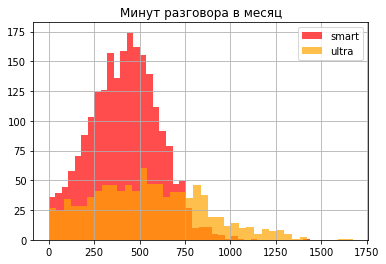

In [ ]:
# Фильтруем по тарифам
call_min_mon_smart = revenue.loc[revenue['tariff'] == 'smart']
call_min_mon_ultra = revenue.query("tariff in 'ultra'")

# Выводим информацию не только графиками, но и табличками
call_min_mon_smart_table = (call_min_mon_smart.groupby('month')['dur_smart'].agg(['mean']))
call_min_mon_ultra_table = (call_min_mon_ultra.groupby('month')['dur_ultra'].agg(['mean']))

display('smart', call_min_mon_smart_table.T)
display('ultra', call_min_mon_ultra_table.T)
revenue[revenue['tariff'] == 'smart']['sum_call'].hist(bins=40, label='smart', color='red', alpha=0.7)
revenue[revenue['tariff'] == 'ultra']['sum_call'].hist(bins=40, label='ultra', color='orange', alpha=0.7)
plt.title("Минут разговора в месяц")
plt.legend()

##### Вывод:

    - Оба тарифа избыточны по лимиту минут.
      По табличкам так и вообще получается в среднем на 250 мин. для "smart" и 2600 мин. для "ultra".
    - Тариф на 250 минут могбы привлечь новых клиентов,
      а тариф на 1000-1500 мин. переманил бы часть пользователей smart/
    - Правда многие пользователи перешли бы на более дешевый тариф.
      Имея возможность подуменьшить предоставляемые им возможности.

### Сколько сообщений требуется пользователям каждого тарифа в месяц?

'smart'

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
mean,-30.0,-22.06,-14.449275,-14.135417,-10.967213,-11.422535,-11.011494,-11.25,-10.780269,-10.917323,-10.118519,-7.735192


'ultra'

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
mean,-956.571429,-967.0625,-952.2,-955.487179,-951.230769,-947.686567,-937.863014,-941.102273,-936.705263,-930.223301,-933.840708,-927.991453


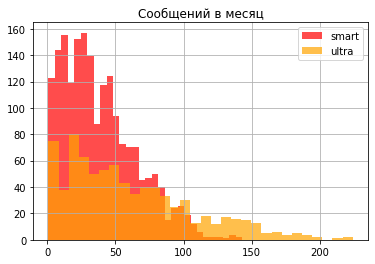

In [ ]:
mes_mon_smart = revenue.loc[revenue['tariff'] == 'smart']
mes_mon_smart_table = (mes_mon_smart.groupby('month')['sms_smart'].agg(['mean']))

mes_mon_ultra = revenue.query("tariff in 'ultra'")
mes_mon_ultra_table = (mes_mon_ultra.groupby('month')['sms_ultra'].agg(['mean']))

display('smart', mes_mon_smart_table.T)
display('ultra', mes_mon_ultra_table.T)
revenue[revenue['tariff'] == 'smart']['sum_id_mes'].hist(bins=30, label='smart', color='red', alpha=0.7)
revenue[revenue['tariff'] == 'ultra']['sum_id_mes'].hist(bins=30, label='ultra', color='orange', alpha=0.7)
plt.title("Сообщений в месяц")
plt.legend();

##### Вывод:

    - Тариф "smart" по СМС'кам вполне актуальный.
      Несколько избыточный, но не критично. Но пик графика приходится на 25 смс/мес.
    - А вот тариф "ultra" по СМС' сверхизбыточный.
      900 лишних СМС из 1000 - это перебор. Получается уйма ненужных СМС входит в аббонентскую плату.
      Больше 250 не требуется.

### Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

'smart'

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
mean,-30.0,-22.06,-14.449275,-14.135417,-10.967213,-11.422535,-11.011494,-11.25,-10.780269,-10.917323,-10.118519,-7.735192


'ultra'

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
mean,-956.571429,-967.0625,-952.2,-955.487179,-951.230769,-947.686567,-937.863014,-941.102273,-936.705263,-930.223301,-933.840708,-927.991453


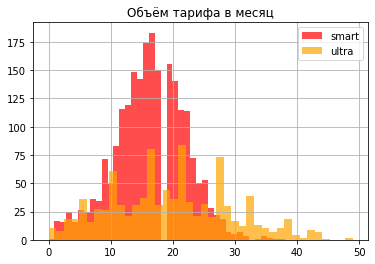

In [ ]:
# Еще немного поизголяемся с вариантами фильтрации
mb_mon_smart = revenue.loc[revenue['tariff'].isin(['smart'])]
mb_mon_ultra = revenue.drop(np.where(revenue['tariff'] == 'ultra')[0])

mb_mon_smart_table = (mb_mon_smart.groupby('month')['mb_smart'].agg(['mean']))
mb_mon_ultra_table = (mb_mon_ultra.groupby('month')['mb_ultra'].agg(['mean']))

display('smart', mes_mon_smart_table.T)
display('ultra', mes_mon_ultra_table.T)
revenue[revenue['tariff'] == 'smart']['sum_int'].hist(bins=40, label='smart', color='red', alpha=0.7)
revenue[revenue['tariff'] == 'ultra']['sum_int'].hist(bins=40, label='ultra', color='orange', alpha=0.7)
plt.title("Объём тарифа в месяц")
plt.legend();

##### Вывод:

    - Также как и СМС тариф "smart" по трафику вполне подходящий.
      Даже несколько удачный: пик графика чуть больше 15ГБ, а это дополнительный трафик.
    - А вот тариф "ultra" по трафику почти на 2/3 избыточный.
      В среднем 19 лишних гигабайт из 30.


По минутам:
 - Медиана = 447.0
 - Среднеарифметическое = 456.9316320100819
 - Дисперсия = 56641.034708300656
 - Стандартное отклонение = 237.99377031405814

        call_mean  call_var  call_std
tariff                               
smart      419.06  35844.19    189.33
ultra      545.45  94203.42    306.93


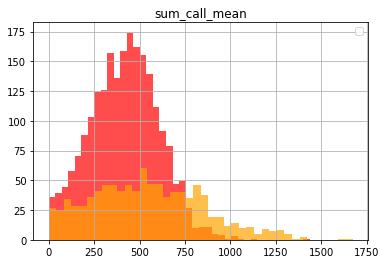

In [ ]:
print() 
print('По минутам:') 
print(' - Медиана =', revenue['sum_call'].median()) 
print(' - Среднеарифметическое =', revenue['sum_call'].mean())  
print(' - Дисперсия =', np.var(revenue['sum_call']))
print(' - Стандартное отклонение =', np.std(revenue['sum_call']))
print()
print(revenue.groupby('tariff').agg(call_mean=('sum_call','mean'), call_var=('sum_call','var'), call_std=('sum_call', 'std')).round(2))

sum_call_pt = revenue.pivot_table(index=['user_id', 'month', 'tariff'],  
                                  aggfunc={"sum_call": [np.mean, np.median]}
                                 ).reset_index()
# Убираем второй этаж в шапке
sum_call_pt.columns = ['_'.join(col).strip() for col in sum_call_pt.columns.values]

sum_call_pt_2 = sum_call_pt.drop(columns=['user_id_', 'month_'])

sum_call_pt_2[sum_call_pt_2['tariff_'] == 'smart']['sum_call_mean'].hist(bins=40, label='smart', color='red', alpha=0.7)
sum_call_pt_2[sum_call_pt_2['tariff_'] == 'ultra']['sum_call_mean'].hist(bins=40, label='ultra', color='orange', alpha=0.7)
plt.title('sum_call_mean')
plt.legend('')

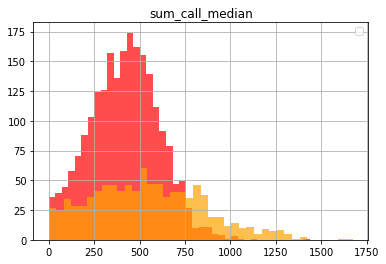

In [ ]:
sum_call_pt_2[sum_call_pt_2['tariff_'] == 'smart']['sum_call_median'].hist(bins=40, label='smart', color='red', alpha=0.7)
sum_call_pt_2[sum_call_pt_2['tariff_'] == 'ultra']['sum_call_median'].hist(bins=40, label='ultra', color='orange', alpha=0.7)
plt.title('sum_call_median')
plt.legend('')


По количеству СМС:
 - Медиана = 38.0
 - Среднеарифметическое = 45.28376886271623
 - Дисперсия = 1228.1458278273149
 - Стандартное отклонение = 35.044911582529565

        mes_mean  mes_var  mes_std
tariff                            
smart      38.72   717.59    26.79
ultra      61.16  2109.66    45.93


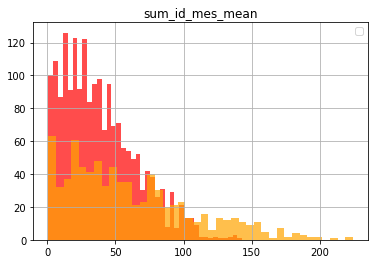

In [ ]:
print() 
print('По количеству СМС:') 
print(' - Медиана =', revenue['sum_id_mes'].median()) 
print(' - Среднеарифметическое =', revenue['sum_id_mes'].mean())  
print(' - Дисперсия =', np.var(revenue['sum_id_mes']))
print(' - Стандартное отклонение =', np.std(revenue['sum_id_mes']))
print()
print(revenue.groupby('tariff').agg(mes_mean=('sum_id_mes','mean'), mes_var=('sum_id_mes','var'), mes_std=('sum_id_mes', 'std')).round(2))

# Не знаю что делать с датами, посчитаем количество СМС в день
sum_id_mes_pt = revenue.pivot_table(index=['user_id', 'month', 'tariff'], 
                                    aggfunc={"sum_id_mes": [np.mean, np.median]}
                                   ).reset_index()
# Убираем второй этаж в шапке
sum_id_mes_pt.columns = ['_'.join(col).strip() for col in sum_id_mes_pt.columns.values]

sum_id_mes_pt_2 = sum_id_mes_pt.drop(columns=['user_id_', 'month_'])

sum_id_mes_pt_2[sum_id_mes_pt_2['tariff_'] == 'smart']['sum_id_mes_mean'].hist(bins=40, label='smart', color='red', alpha=0.7)
sum_id_mes_pt_2[sum_id_mes_pt_2['tariff_'] == 'ultra']['sum_id_mes_mean'].hist(bins=40, label='ultra', color='orange', alpha=0.7)
plt.title('sum_id_mes_mean')
plt.legend('')

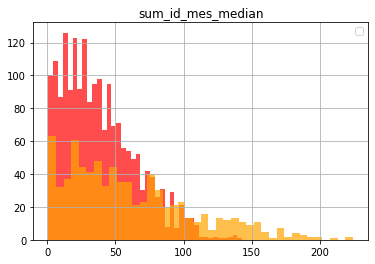

In [ ]:
sum_id_mes_pt_2[sum_id_mes_pt_2['tariff_'] == 'smart']['sum_id_mes_median'].hist(bins=40, label='smart', color='red', alpha=0.7)
sum_id_mes_pt_2[sum_id_mes_pt_2['tariff_'] == 'ultra']['sum_id_mes_median'].hist(bins=40, label='ultra', color='orange', alpha=0.7)
plt.title('sum_id_mes_median')
plt.legend('')


По мегабайтам:
 - Медиана = 17.0
 - Среднеарифметическое = 17.358413986887292
 - Дисперсия = 53.908379876069915
 - Стандартное отклонение = 7.342232622034657

        int_mean  int_var  int_std
tariff                            
smart      16.34    32.92     5.74
ultra      19.69    94.15     9.70


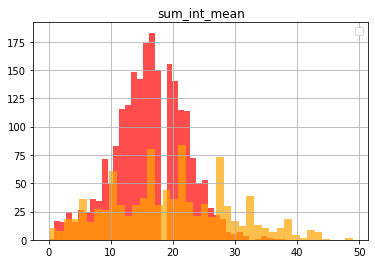

In [ ]:
print() 
print('По мегабайтам:') 
print(' - Медиана =', revenue['sum_int'].median()) 
print(' - Среднеарифметическое =', revenue['sum_int'].mean())  
print(' - Дисперсия =', np.var(revenue['sum_int']))
print(' - Стандартное отклонение =', np.std(revenue['sum_int']))
print()
print(revenue.groupby('tariff').agg(int_mean=('sum_int','mean'), int_var=('sum_int','var'), int_std=('sum_int', 'std')).round(2))

sum_int_pt = revenue.pivot_table(index=['user_id', 'month', 'tariff'],  
                                 aggfunc={"sum_int": [np.mean, np.median, np.var, np.std]}
                                ).reset_index()
# Убираем второй этаж в шапке
sum_int_pt.columns = ['_'.join(col).strip() for col in sum_int_pt.columns.values]

sum_int_pt_2 = sum_int_pt.drop(columns=['user_id_', 'month_'])

sum_int_pt_2[sum_int_pt_2['tariff_'] == 'smart']['sum_int_mean'].hist(bins=40, label='smart', color='red', alpha=0.7)
sum_int_pt_2[sum_int_pt_2['tariff_'] == 'ultra']['sum_int_mean'].hist(bins=40, label='ultra', color='orange', alpha=0.7)
plt.title('sum_int_mean')
plt.legend('')

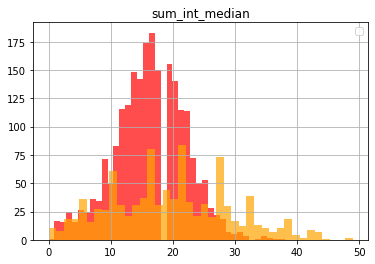

In [ ]:
sum_int_pt_2[sum_int_pt_2['tariff_'] == 'smart']['sum_int_median'].hist(bins=40, label='smart', color='red', alpha=0.7)
sum_int_pt_2[sum_int_pt_2['tariff_'] == 'ultra']['sum_int_median'].hist(bins=40, label='ultra', color='orange', alpha=0.7)
plt.title('sum_int_median')
plt.legend('')

## Шаг 4. Проверьте гипотезы

	• средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
	• средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.
Поясните:

	• как вы формулировали нулевую и альтернативную гипотезы;
	• какой критерий использовали для проверки гипотез и почему.

### Средняя выручка от пользователей тарифов «Ультра» и «Смарт» различаются.

In [ ]:
# Выручка smart
rev_smart = revenue[revenue['tariff'] == 'smart']['revenue']

# Выручка ultra
rev_ultra = revenue[revenue['tariff'] == 'ultra']['revenue']


# Математика позволяет проверить альтернативную гипотезу:
# о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
print()
print('Средняя выручка smart: ',pd.Series(rev_smart).mean())
print('Средняя выручка ultra: ',pd.Series(rev_ultra).mean())
alpha = .01 # критический уровень статистической значимости
results = st.ttest_ind(rev_smart, rev_ultra) 
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.\nСредние выручки пользователей тарифов «Ультра» и «Смарт» не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу.\nНеравенство средних выручек пользователей тарифов «Ультра» и «Смарт» не доказано.")


Средняя выручка smart:  1289.9735307312696
Средняя выручка ultra:  2070.1522842639592
p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу.
Средние выручки пользователей тарифов «Ультра» и «Смарт» не равны


### Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

In [ ]:
# Добавляем столбец city
revenue = revenue.assign(city = revenue.user_id)
for user_id in revenue['user_id']:
    cit = users[(users['user_id'] == user_id)]['city'].min()
    revenue['city'].where(~(revenue.city == user_id), other=cit, inplace=True)

# Выручка по Москве
rev_mos = revenue[revenue['city'] == 'Москва']['revenue']

# Удаляем NaN, чтобы статистику не портили
rev_mos = rev_mos.fillna(0)

# Выручка по неМоскве
rev_nmos = revenue[revenue['city'] != 'Москва']['revenue']
rev_nmos = rev_nmos.fillna(0)

# Математика не позволяет проверить такую гипотезу, поэтому проверяем альтернативную:
# о том, что средняя выручка пользователей из Москвы такая же 
# что и выручки пользователей из других регионов.
print()
print('Средняя выручка в Москве: ',pd.Series(rev_mos).mean())
print('Средняя выручка вне Москвы: ',pd.Series(rev_nmos).mean())
alpha = .01 # критический уровень статистической значимости
results = st.ttest_ind(rev_mos, rev_nmos) 
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.\nСредняя выручка от пользователей в Москве не равна выручке в регионах.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.\nРавенство средних выручек пользователей из Москвы и регионов не доказано.")


Средняя выручка в Москве:  1546.7135842880523
Средняя выручка вне Москвы:  1524.9362274298885
p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу.
Равенство средних выручек пользователей из Москвы и регионов не доказано.


## Шаг 5. Общий вывод

Исследование данных для корректировки рекламного бюджета, согласно прилагаемому заданию выполнено в полном объеме.
Полученные статистические данные можно использовать для определения: как улучшить тарифы. Все промежутоные выводы вынесены в содержание для простоты ориентирования и получения больших подробностей. А общие выводы таковы:

    - Оба тарифа избыточны по лимиту минут.
    - Тариф "ultra" по СМС' непомерный.
    - Тариф "ultra" по трафику превышающий потребности.

Также были проверены 2 гипотезы результатом которых получились следующие утверждения:

    - Средняя выручка smart:  1091.46
      Средняя выручка ultra:  1564.26
      Средние выручки пользователей тарифов «Ультра» и «Смарт» не равны
    - Средняя выручка в Москве:  1241.83
      Средняя выручка вне Москвы:  1235.08
      Равенство средних выручек пользователей из Москвы и регионов не доказано.